## Problem Statement

Read the following data set:<br>
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [150]:
#Import Libraries
import numpy as np
import pandas as pd
import sqlite3
from sqlalchemy import create_engine

In [151]:
#Read The File from the URL. Assign names to the columns

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df =pd.read_csv(url,engine='python',names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital_Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital_Gain", "Capital_Loss","Hours_per_week", "Country", "Wage"])

## Task:
### 1. Create an sqlalchemy engine using a sample from the data set

In [152]:
## Connect to sqllite and create a database(adata) with the data read above

# Create sqlite engine
engine = create_engine('sqlite:///adata',echo=False)

# Convert dataframe to sqlite object
df.to_sql('adata',con = engine,if_exists = 'replace')

#Connect to Sqlite engine and create cursor
con=sqlite3.connect('adata')
cur=con.cursor()

In [153]:
## Check connection and data
pd.read_sql_query("select * from adata ",con).head()

,index,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Wage
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2. Write two basic update queries

In [154]:
# Query 1
cur.execute("Update adata set Country='Others' where fnlwgt='77516'")

In [155]:
#Check if the data was updated Country should be 'Others' for the below

pd.read_sql_query("select * from adata where fnlwgt='77516'",con).head()

,index,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Wage
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,Others,<=50K


In [156]:
# Query 2
con.execute("update adata set Capital_Gain=400 where Education=' Bachelors' and Age<=50")

In [157]:
# Check Data
pd.read_sql_query("select * from adata where Education=' Bachelors' and Age<=50",con).head()

,index,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Wage
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,400,0,40,Others,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,400,0,13,United-States,<=50K
2,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,400,0,40,Cuba,<=50K
3,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,400,0,40,United-States,>50K
4,11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,400,0,40,India,>50K


### 3. Write two delete queries

#### Query 1

#Delete the record for <b>fnlwgt = 338409

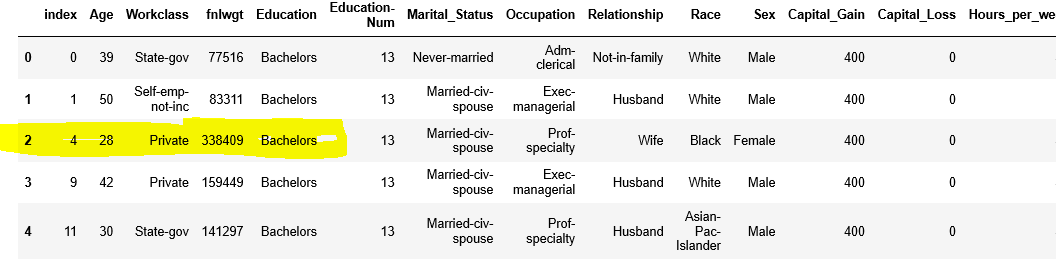

In [158]:
con.execute("delete from adata where fnlwgt='338409'")

In [159]:
#Check if the record was deleted. Count should be 0 for the below
pd.read_sql_query("select count(*) from adata where fnlwgt=338409",con).head()

,count(*)
0,0


#### Query 2: Delete records where Age is less than 30

In [160]:
con.execute("delete from adata where Age<30")

In [161]:
#Check if the data was deleted. The result should only have Age>=30

pd.read_sql_query("select * from adata group by Age order by Age",con).head()

,index,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Wage
0,11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,400,0,40,India,>50K
1,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
2,13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
3,87,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
4,15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K


### 4. Write two filter queries

#### Query 1: Filter all data where Education is 'Masters'

In [162]:
pd.read_sql_query("select * from adata where Education=' Masters'",con).head()

,index,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Wage
0,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
1,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
2,19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
3,47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
4,87,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


##### Query 2: Filter all records where Education is 'Bachelors' and Occupation is 'Tech-Support'

In [163]:
pd.read_sql_query("select * from adata where Education=' Bachelors' and Occupation=' Tech-support'",con).head()

,index,Age,Workclass,fnlwgt,Education,Education-Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Wage
0,25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
1,194,41,Federal-gov,130760,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,400,0,24,United-States,<=50K
2,469,30,Private,118551,Bachelors,13,Married-civ-spouse,Tech-support,Wife,White,Female,400,0,16,United-States,>50K
3,584,31,Self-emp-not-inc,340939,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,400,0,40,United-States,<=50K
4,600,32,Private,239824,Bachelors,13,Never-married,Tech-support,Not-in-family,White,Male,400,0,40,United-States,<=50K


### 5. Write two function queries

#### Query 1: Statistics By Selected Field

In [167]:
con.close()
def stat(field):
    con=sqlite3.connect('adata')
    cur=con.cursor()
    print("Top 5 Statistics By ",field)
    sql="select "+field+",count(*) from adata group by "+field+" Order By count(*) desc Limit 5"
    cur.execute(sql)
    res=cur.fetchall()
    con.close()
    return res
print(stat("Age"))
print(stat("Occupation"))

Top 5 Statistics By  Age
[(36, 898), (31, 888), (34, 886), (23, 877), (35, 876)]
Top 5 Statistics By  Occupation
[(' Prof-specialty', 4140), (' Craft-repair', 4099), (' Exec-managerial', 4066), (' Adm-clerical', 3770), (' Sales', 3650)]


#### Query 2: Average Age Of Pupulation By Country

In [168]:
con.close()
def avg_age_country():
    con=sqlite3.connect('adata')
    cur=con.cursor()
    cur.execute("select Country,AVG(Age) as 'Average_Age' from adata group by Country")
    res=cur.fetchall()
    con.close()
    return res
avg_age_country()

[(' ?', 38.72555746140652),
 (' Cambodia', 37.78947368421053),
 (' Canada', 42.54545454545455),
 (' China', 42.53333333333333),
 (' Columbia', 39.71186440677966),
 (' Cuba', 45.76842105263158),
 (' Dominican-Republic', 37.72857142857143),
 (' Ecuador', 36.642857142857146),
 (' El-Salvador', 34.132075471698116),
 (' England', 41.15555555555556),
 (' France', 38.96551724137931),
 (' Germany', 39.25547445255474),
 (' Greece', 46.206896551724135),
 (' Guatemala', 32.421875),
 (' Haiti', 38.27272727272727),
 (' Holand-Netherlands', 32.0),
 (' Honduras', 33.84615384615385),
 (' Hong', 33.65),
 (' Hungary', 49.38461538461539),
 (' India', 38.09),
 (' Iran', 39.41860465116279),
 (' Ireland', 36.458333333333336),
 (' Italy', 46.42465753424658),
 (' Jamaica', 35.592592592592595),
 (' Japan', 38.24193548387097),
 (' Laos', 34.72222222222222),
 (' Mexico', 33.29082426127527),
 (' Nicaragua', 33.61764705882353),
 (' Outlying-US(Guam-USVI-etc)', 38.714285714285715),
 (' Peru', 35.25806451612903),
 (